# Week-1 of Course-2

In [7]:
# importing the vital modules.
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

I Couldn't upload images due to some internal memory issue. I'll try my best to explain each line of code.

In [8]:
model = Sequential([
    # note the input shape its (150x150) with 3-bytes 'cause of rgb.
    Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # flatten will take multi-dimensions and convert it into single 1-Dimensions.
    Flatten(),
    
    Dense(512, activation='relu'),
    # only 1 neuron for output. since were dealing with binary classification
    Dense(1, activation='sigmoid')
])


In [9]:
# it will return some info of the model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [10]:
# its time to compile the model.
# introducing the new optimizer.
# since, we're classifying Dog vs Cat. So, we'll be using binary crossentropy.
# to check the performance of the model we'll be using metrics. In that I'll mention accuracy.
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [11]:
#Data preprocessing step.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# I'll rescale the images with the help of Generator.
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

#Flow training images in batches of 20 using train_datagen Generator.

train_dir = 'F:/basic_python/Coursera/dataset/train_images'
validation_dir = 'F:/basic_python/Coursera/dataset/test_images'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode = 'binary',
                                                  target_size = (150, 150))
# target_size = size of the image.
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                       batch_size=9,
                                                       class_mode='binary',
                                                       target_size=(150, 150))

Found 24818 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


When you are using generator you have to  specify "steps_per_epoch". what it does(see below cell) it should cover 100 times the batch_size (per epoch should cover the batch_size of 20 for about 100 times(for training) and same intution applies for about 50 times (for validation)).

In [13]:
history = model.fit(train_generator, # train data.
          
          epochs = 15, # Training for 10 epochs.
          steps_per_epoch=10, 
          validation_data=validation_generator, # test data.
          validation_steps=5,
          verbose =1) # I don't want the progress bar.

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 5 steps
Epoch 1/15
10/10 [==============================] - 17s 2s/step - loss: 0.6970 - accuracy: 0.4900 - val_loss: 0.6934 - val_accuracy: 0.4889
Epoch 2/15
10/10 [==============================] - 16s 2s/step - loss: 0.6971 - accuracy: 0.4900 - val_loss: 0.6912 - val_accuracy: 0.5778
Epoch 3/15
 1/10 [==>...........................] - ETA: 19s - loss: 0.6864 - accuracy: 0.6000

D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0.

10/10 [==============================] - 18s 2s/step - loss: 0.6814 - accuracy: 0.5850 - val_loss: 0.6809 - val_accuracy: 0.5111
Epoch 4/15
10/10 [==============================] - 15s 2s/step - loss: 0.7228 - accuracy: 0.5250 - val_loss: 0.6906 - val_accuracy: 0.4667
Epoch 5/15
10/10 [==============================] - 16s 2s/step - loss: 0.6848 - accuracy: 0.5650 - val_loss: 0.7410 - val_accuracy: 0.4889
Epoch 6/15
10/10 [==============================] - 16s 2s/step - loss: 0.6915 - accuracy: 0.5450 - val_loss: 0.6425 - val_accuracy: 0.6667
Epoch 7/15
10/10 [==============================] - 16s 2s/step - loss: 0.7280 - accuracy: 0.5300 - val_loss: 0.6697 - val_accuracy: 0.5333
Epoch 8/15
10/10 [==============================] - 16s 2s/step - loss: 0.6844 - accuracy: 0.5700 - val_loss: 0.6565 - val_accuracy: 0.7556
Epoch 9/15
10/10 [==============================] - 16s 2s/step - loss: 0.7836 - accuracy: 0.5300 - val_loss: 0.6757 - val_accuracy: 0.5111
Epoch 10/15
10/10 [============

D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 422313984 bytes but o

10/10 [==============================] - 17s 2s/step - loss: 0.6366 - accuracy: 0.6700 - val_loss: 0.7045 - val_accuracy: 0.6000


In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# loading the image.

predict_img = 'F:/basic_python/Coursera/dataset/random_images.jpg'
# Desired image size for loading the image.
img = image.load_img(predict_img, target_size=(150, 150))

x = image.img_to_array(img) # converting the image into array.
pred_img = np.expand_dims(x, axis=0) # expanding the dimensions of the array.

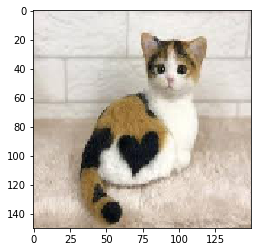

<Figure size 864x1008 with 0 Axes>

In [21]:
# Visualize the predicting image.
import matplotlib.pyplot as plt
plt.imshow(img)
plt.figure(figsize=(12,14))
plt.show()

In [23]:
# predicting the image.
pred_val = model.predict(pred_img)

# print(pred_val[0])

if (pred_val[0]>0):
    print(f'{pred_val[0][0]} is a dog')

else:
    print('its a cat')

1.0 is a dog


As you can see clearly our model is aheading towards overfitting.

### Plotting the Accuracy.

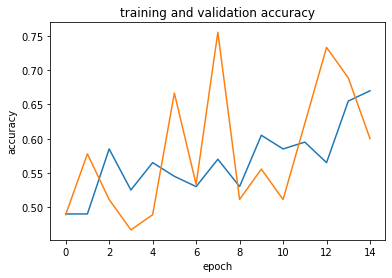

In [19]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
#Plotting the Accuracy vs Val_accuracy.
import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 15)) # size of the figure
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
# title of the graph
plt.title('training and validation accuracy')

plt.xlabel('epoch') # naming the x-axis.
plt.ylabel('accuracy') # naming the y-axis.
plt.show() # show the output.

### Plotting the Loss.

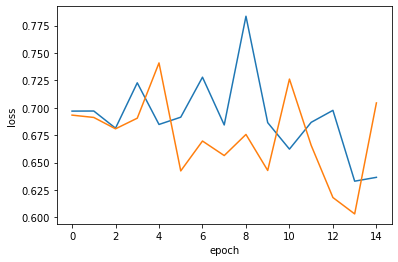

In [20]:
# plotting the loss vs val_loss.
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()